## Observations and Insights 

1. There are 248 mice total being treated in this experiment. 123 Female, 125 Male.

2. It seem capomulin is the most effective treatment in this experiment, has the most reduction in tumor size. Ramicane is second best.

3. The more a mouse weighs, the higher the tumor volume in those mice.

In [115]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")



# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [116]:
# Checking the number of mice.
number_of_mice = len(mouse_data_df["Mouse ID"].unique())

number_of_mice = pd.DataFrame({"Total Mice": [number_of_mice]})


number_of_mice

,Total Mice
0,249


In [117]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_data_df = mouse_data_df["Mouse ID"].unique()
# mouse_data_df[mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
                                       
duplicate_mice = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [118]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(duplicate_mice)==False]

clean_mouse_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [119]:
# Checking the number of mice in the clean DataFrame.

clean_final = clean_mouse_df["Mouse ID"].value_counts()
clean_final = len(clean_final)
clean_final

248

## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]



regimen_median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]



regimen_variance = clean_mouse_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]



regimen_std = clean_mouse_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]


regimen_sem = clean_mouse_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

#regimen_mean
#regimen_median
#regimen_variance
#regimen_std
#regimen_sem

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

mouse_stats


# Using the aggregation method, produce the same summary statistics in a single line
# single_group_by = clean_mouse_df.groupby('Drug Regimen')
# summary_stats1 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# summary_stats1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

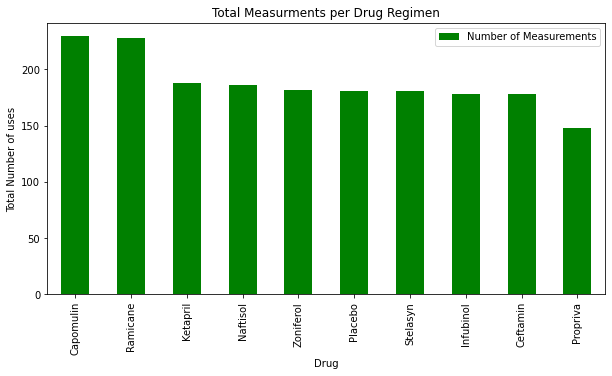

In [122]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_final = clean_mouse_df[["Drug Regimen", "Mouse ID"]]

drug_name = drug_final["Drug Regimen"].unique()
#drug_name

drug_count = drug_final["Drug Regimen"].value_counts()
#drug_final

drug_counts = pd.DataFrame({"Number of Measurements": drug_count})
drug_counts.set_index(drug_name)
drug_counts = drug_counts.reset_index()


drug_counts.head()

drug_counts.plot(kind="bar", title="Total Measurments per Drug Regimen", xlabel="Drug", ylabel="Total Number of uses", align="center", color="green",
                 figsize=(10,5), x="index", y="Number of Measurements")


plt.show()


In [123]:
#Have to count number of males/females first.
mouse_gender = clean_mouse_df.groupby(["Mouse ID","Sex"])

genders_df = pd.DataFrame(mouse_gender.size())

# New DF with gender counts
mouse_gender1 = pd.DataFrame(genders_df.groupby(["Sex"]).count())
mouse_gender1.columns = ["Total Count"]
#mouse_gender1

# create and format the percentage of female vs male
mouse_gender1["Percentage of Sex"] = (100*(mouse_gender1["Total Count"]/mouse_gender1["Total Count"].sum()))
mouse_gender1

# # format the "Percentage of Sex" column
# mouse_gender1["Percentage of Sex"] = mouse_gender1["Percentage of Sex"]


# mouse_gender1

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


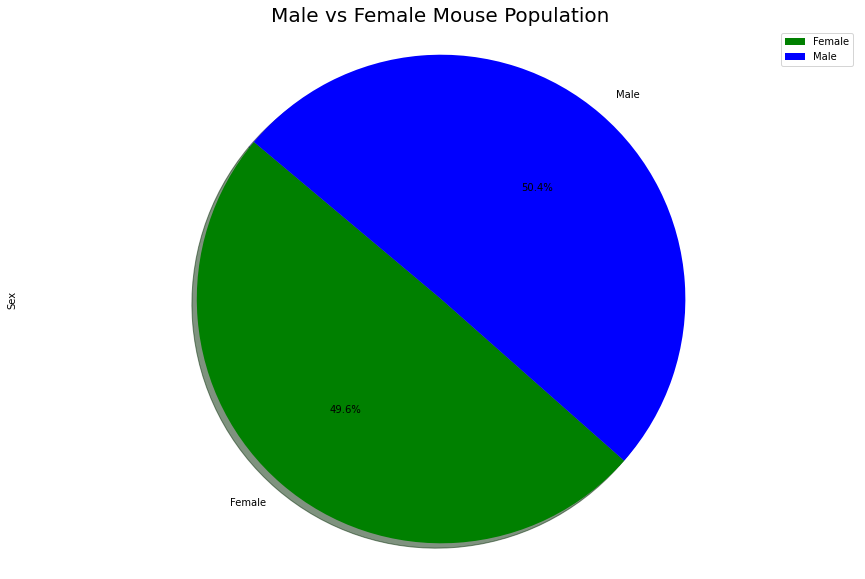

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['green', 'blue']
# explode = (0.5, 0)
plot = mouse_gender1.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.axis("equal")

plt.show()


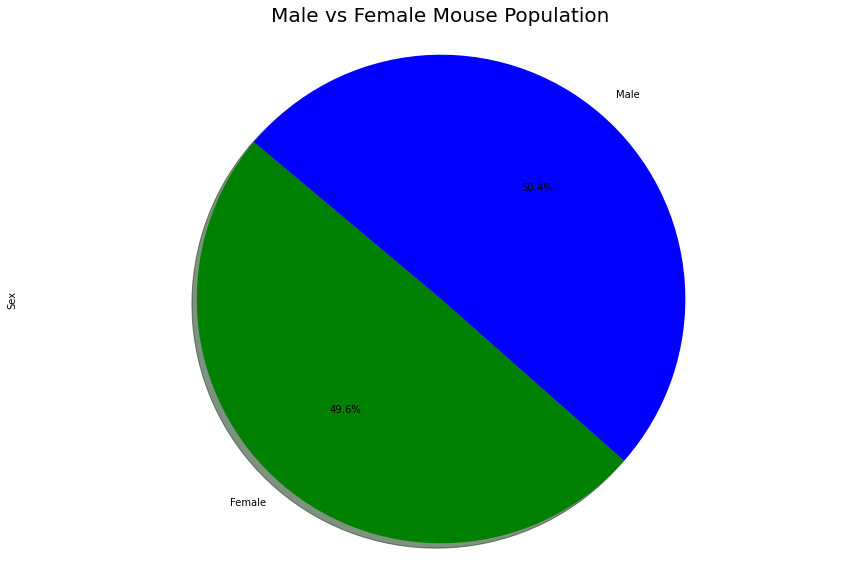

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.596774,50.403226]

colors = ['green', 'blue']

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.axis("equal")


plt.show()


## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Getting dataframes with each drug
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin",:]

# capomulin_df
# ramicane_df
# infubinol_df
# ceftamin_df


# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

#capomulin_last
# ramicane_last
# infubinol_last
# ceftamin_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#####capomulin
capomulin_volume = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#capomulin_merge.head()

#####ramicane
ramicane_volume = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#ramicane_merge.head()


######infubinol
infubinol_volume = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#infubinol_merge.head()

#########ceftamin
ceftamin_volume = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_volume, clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#ceftamin_merge.head()

##I couldnt merge everything into one dataframe so I used seperate ones

In [127]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# instead of a for loop, just used every dataframe seperately to calculate IQR
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [128]:
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [129]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [130]:
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles =ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


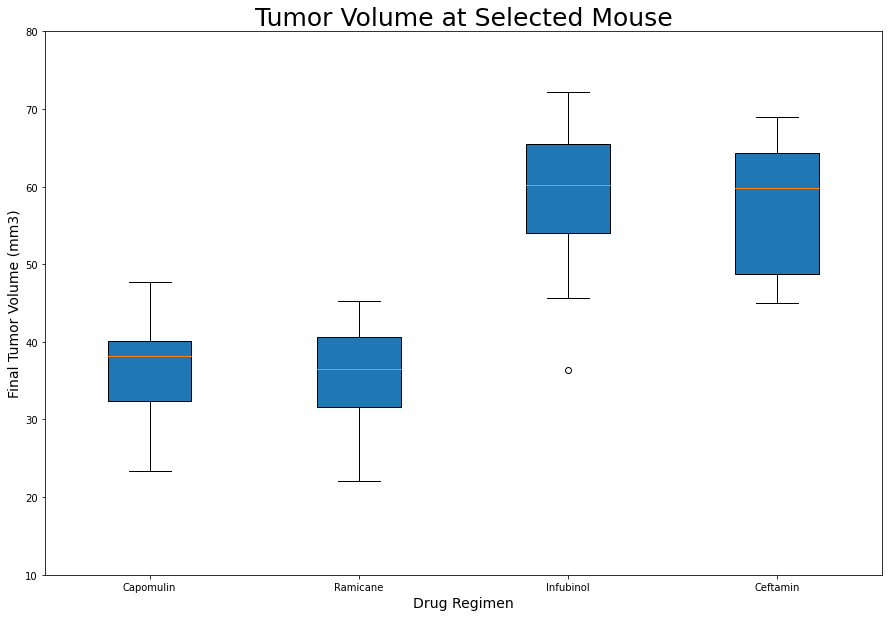

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
drug = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=drug, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

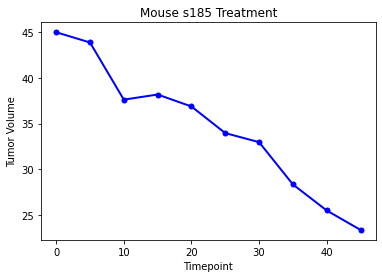

In [132]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
s185_df.head(10)


x_axis = s185_df["Timepoint"]
tumor_size = s185_df["Tumor Volume (mm3)"]

plt.title("Mouse s185 Treatment")
plt.plot(x_axis, tumor_size ,linewidth=2, markersize=5, marker="o", color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()


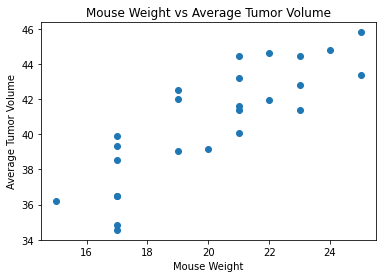

In [133]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
#capomulin_avg


plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.show()



## Correlation and Regression

In [134]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"{corr}")



0.84


In [137]:
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"{slope}")
print(f"{intercept}")
print(f"{rvalue}")
print(f"{corr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

0.9544396890241045
21.552160532685015
0.8419363424694718
0.84
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


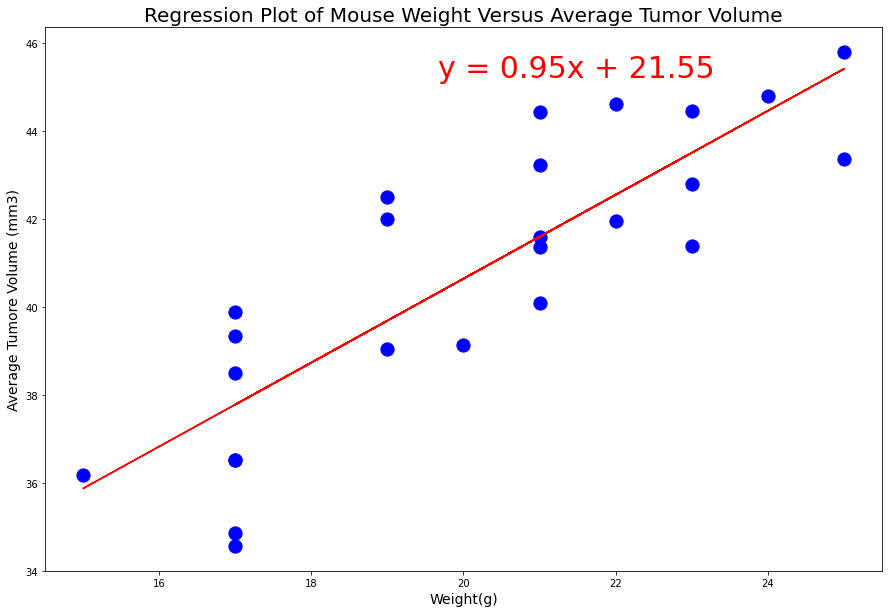

In [138]:
#Linear Regression Equation

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()